* Strona biblioteki: https://scikit-learn.org
* Dokumentacja/User Guide: https://scikit-learn.org/stable/user_guide.html¶

In [1]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.7.1'

In [2]:
data = {
    "size": ["XL", "L", "M", np.nan, "M", "M"],
    "color": ["red", "green", "blue", "green", "red", "green"],
    "gender": ["female", "male", np.nan, "female", "female", "male"],
    "price": [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    "weight": [500, 450, 300, np.nan, 410, np.nan],
    "bought": ["yes", "no", "yes", "no", "yes", "no"],
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [3]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


In [4]:
df.isnull()  # maska logiczna z brakami danych

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [5]:
df.isnull().sum()  # liczba pól w kolumnie z brakami danych

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [6]:
df.isnull().sum().sum()  # łaczna liczba braków danych w ramce

np.int64(5)

In [7]:
df.isnull().sum() / len(df) # jdnostkowy brak danych 

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

In [8]:
df.isnull().sum() / len(df) * 100 # procentowy brak danych

size      16.666667
color      0.000000
gender    16.666667
price     16.666667
weight    33.333333
bought     0.000000
dtype: float64

### Uzupełnianie braków
### SimpleImputer

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
df[['weight']]

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


In [11]:
# rodzaje strategii: mean, median, most_frequent, constant
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [12]:
imputer.statistics_ # wartość wyliczona 

array([415.])

In [13]:
imputer.transform(df[['weight']]) # uzupełnienie braków w całej kolumnie

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [14]:
df['weight'] = imputer.transform(df[['weight']]) 
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [15]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)  # uzupełnienie stałą wartością 99.0
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')  # uzupełnienie stałą wartością 99.0
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [17]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value='L')  # uzupełnienie najczęście występującym
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [19]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [20]:
df[pd.isnull(df['weight'])] # wiersze gdzie niema braków w kolumnie 

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [21]:
df[~pd.isnull(df['weight'])] # przeciwieństwo poprzedniego

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [22]:
df[pd.notnull(df['weight'])] 

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [23]:
df[~pd.notnull(df['weight'])] 

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [24]:
df.fillna(value='brak') # zamiana NaN na dowolną wartość

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [25]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,0.0,no


In [26]:
df['size']

0     XL
1      L
2      M
3    NaN
4      M
5      M
Name: size, dtype: object

In [27]:
df['size'].fillna(value='L', inplace=True) # zamiana w jednej kolumnie i zapisanie do df
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [28]:
df.dropna() # usunięcie z df wustkich wierszy z brakami, z parametrem inplace=True zapisze nam do df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [29]:
df = df.dropna() # parametr thresh opisuje poziom usunięć np. 2 to powyżej 2 będzie usunięte
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


### Braki danych w szeregach czasowych

In [30]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


In [31]:
# from pandas.plotting import register_matplotlib_converters
# import matplotlib.pyplot as plt
# import seaborn as sns
# register_matplotlib_converters()
# sns.set()

# plt.figure(figsize=(10, 4))
# plt.title('Braki danych')
# _ = plt.plot(df.price)

In [38]:
import plotly.express as px

df_plotly = df.reset_index()
df_plotly

,index,price
0,2020-01-01 09:00:00,108.0
1,2020-01-01 10:00:00,109.0
2,2020-01-01 11:00:00,110.0
3,2020-01-01 12:00:00,110.0
4,2020-01-01 13:00:00,109.0
5,2020-01-01 14:00:00,NaN
6,2020-01-01 15:00:00,NaN
7,2020-01-01 16:00:00,112.0
8,2020-01-01 17:00:00,111.0
9,2020-01-01 18:00:00,111.0


In [40]:
type(df_plotly)

pandas.core.frame.DataFrame

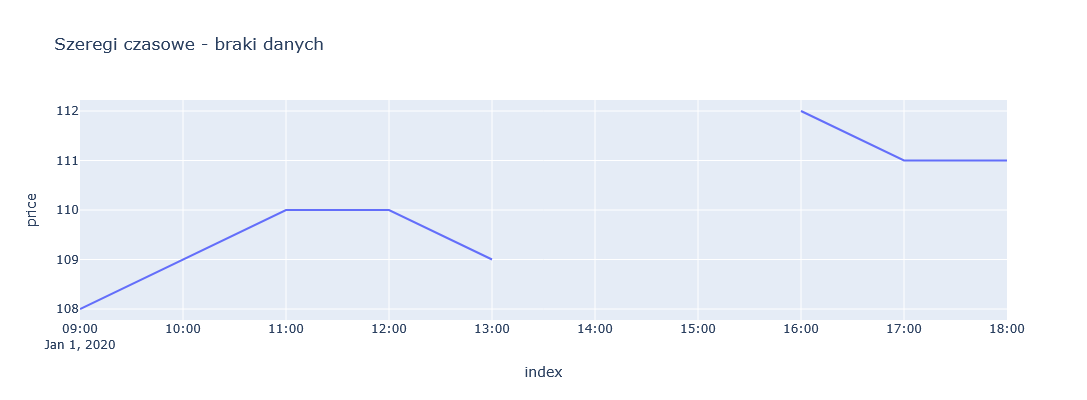

In [37]:
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - braki danych')

### Usunięcie braku danych

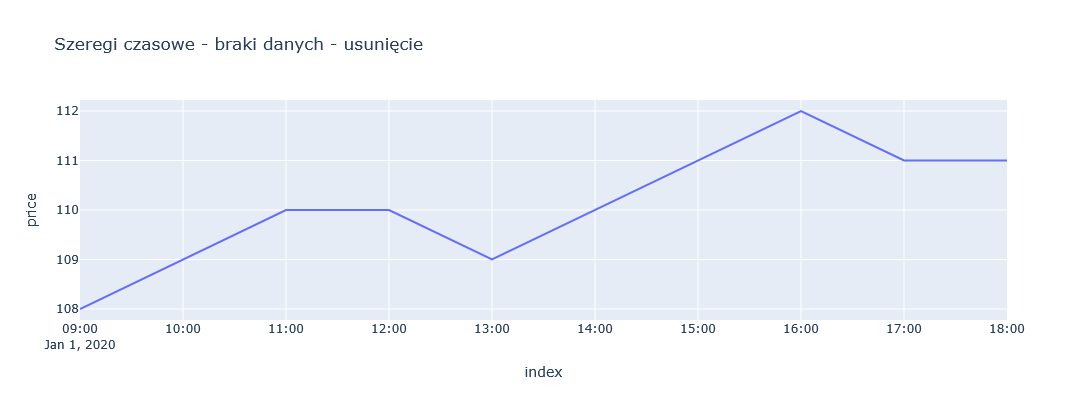

In [33]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - braki danych - usunięcie')

### Wypełnienie stała wartością

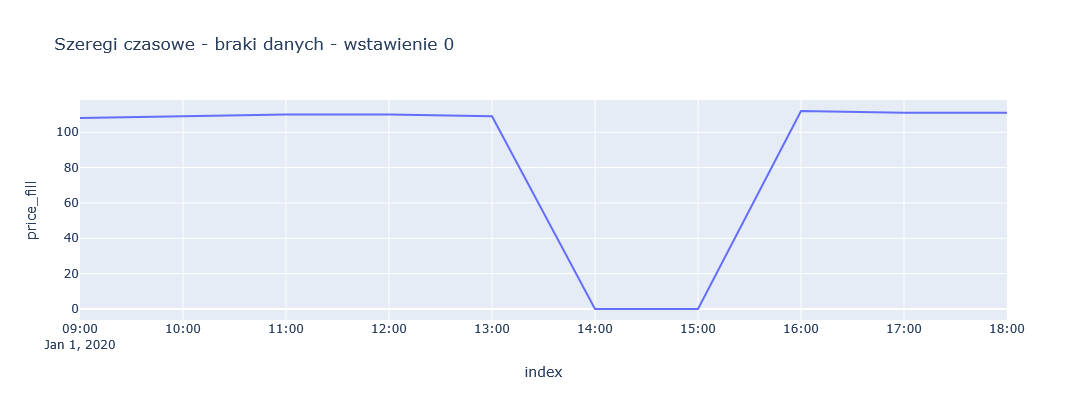

In [42]:
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - wstawienie 0')

### Wypełnienie średnią

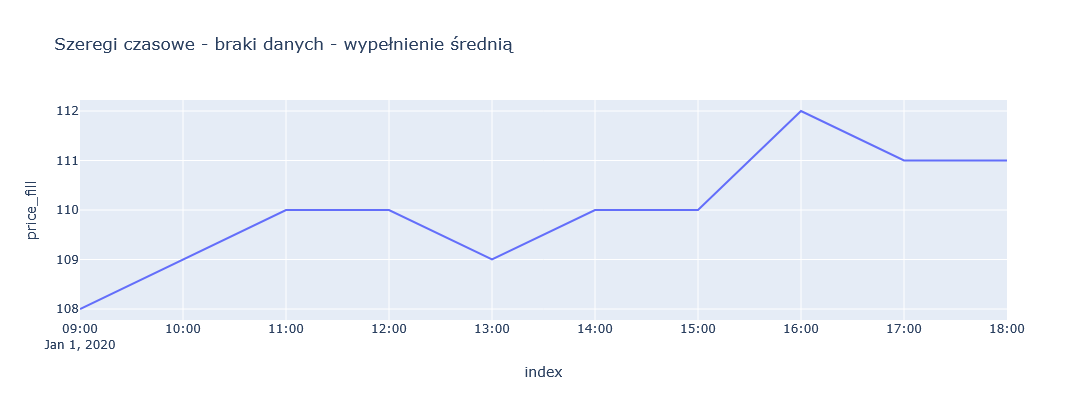

In [43]:
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - wypełnienie średnią')

#### Interpolacja danych

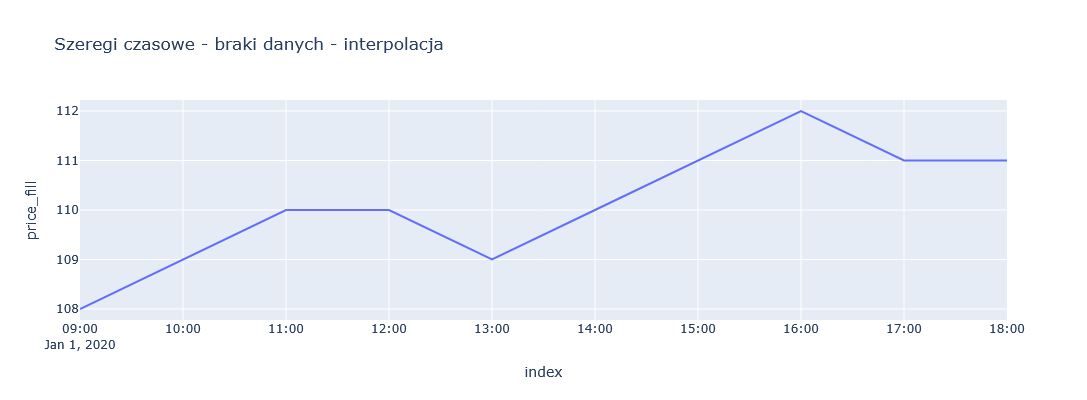

In [44]:
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - interpolacja')

### Forward fill - uzupełanianie ostatnią

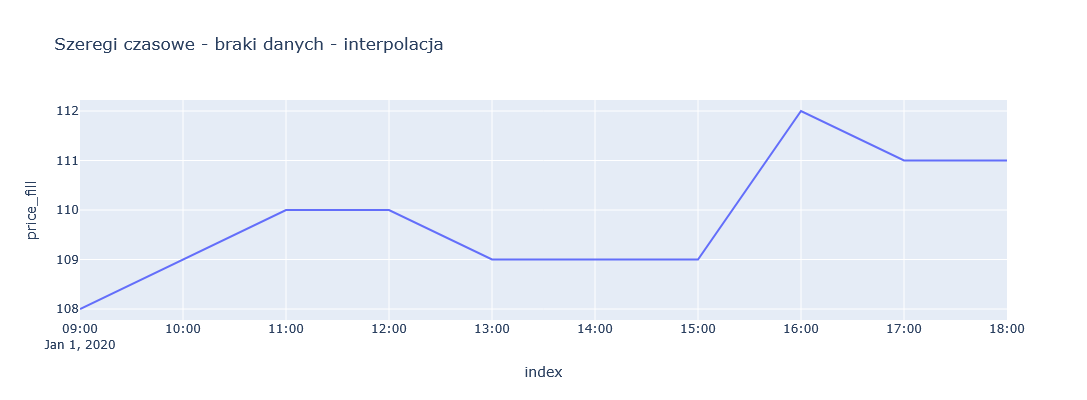

In [47]:
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].ffill() #fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - ostatnią')

### Backward fill - uzupełanianie następną

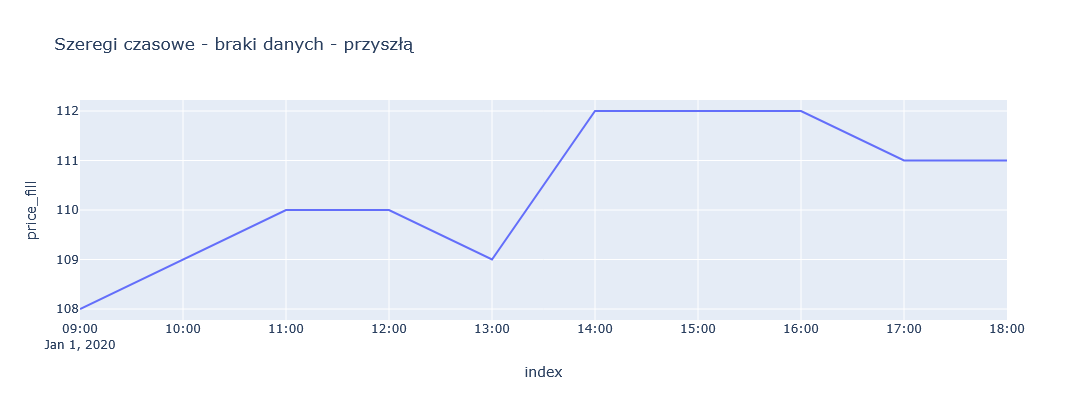

In [50]:
df_plotly = df.reset_index()
df_plotly["price_fill"] = df_plotly["price"].bfill() #fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - przyszłą')